In [1]:
# İlgili kütüphanelerin yüklenmesi ve ilerleyen kod parçalarında kolay referans verebilmek adına kısaltmalarla işaretlenmesi

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
# Seçtiğim .csv verinin python tarafından okunarak bir DataFrame ögesine dönüştürülmesi ve ardından bu ögenin ilk satırlarının gösterilmesi.
dem_index = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-11-05/democracy_data.csv')


dem_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14768 entries, 0 to 14767
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_name                 14768 non-null  object 
 1   country_code                 14768 non-null  object 
 2   year                         14768 non-null  int64  
 3   regime_category_index        11291 non-null  float64
 4   regime_category              14767 non-null  object 
 5   is_monarchy                  14554 non-null  object 
 6   is_commonwealth              14625 non-null  object 
 7   monarch_name                 2883 non-null   object 
 8   monarch_accession_year       2883 non-null   float64
 9   monarch_birthyear            2741 non-null   float64
 10  is_female_monarch            2883 non-null   object 
 11  is_democracy                 14706 non-null  object 
 12  is_presidential              14635 non-null  object 
 13  president_name  

In [3]:
# 1. regime_category_index sütununda NaN olan satırları belirleyin (maske oluşturun).
na_mask = dem_index['regime_category_index'].isna()

# 2. Bu maskeyi (.loc ile) kullanarak, ilgili satırların SADECE 'regime_category'
# sütunundaki değerlerini 'other' olarak değiştirin.
dem_index.loc[na_mask, 'regime_category'] = 'Other'

# dem_index DataFrame'i artık orijinal satır sayısını korur, ancak
# NaN rejimleri 'other' kategorisi altında gruplanmıştır.
filtered_dem_index = dem_index

In [4]:
plot_data = filtered_dem_index.groupby(['year', 'regime_category']).size().reset_index(name='count')
pivot_data = plot_data.pivot(index='year', columns='regime_category', values='count').fillna(0)

plot_data.head()

year          regime_category  count
0  1950    Civilian dictatorship     23
1  1950                   Colony      1
2  1950    Military dictatorship     13
3  1950         Mixed democratic      5
4  1950  Parliamentary democracy     21

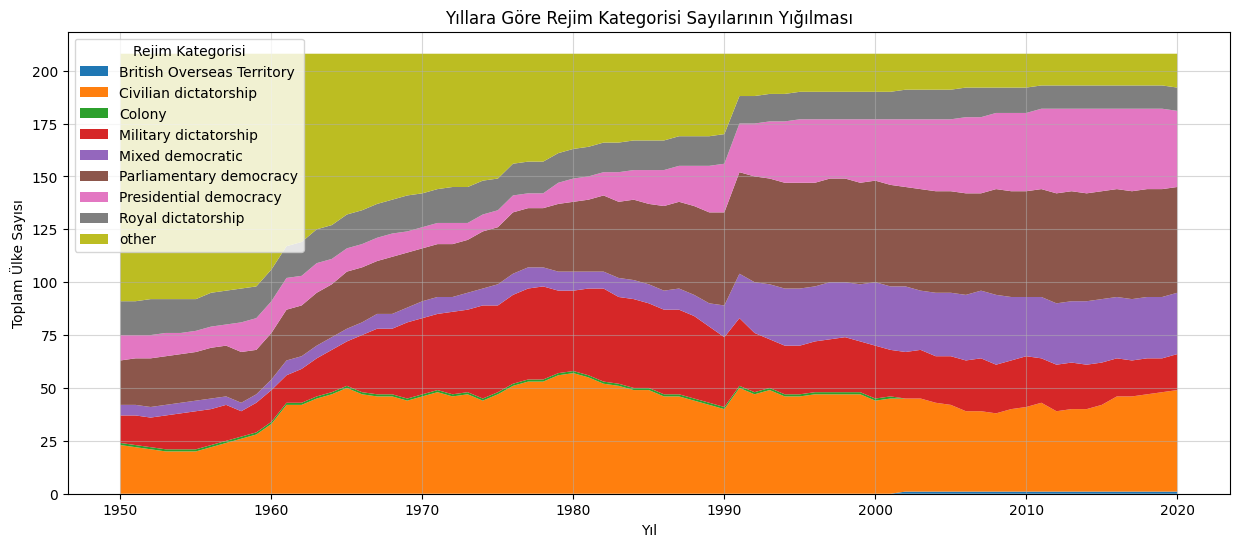

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.stackplot(
    pivot_data.index,
    pivot_data.values.T,
    labels=pivot_data.columns,
)
ax.set_title('Yıllara Göre Rejim Kategorisi Sayılarının Yığılması')
ax.set_xlabel('Yıl')
ax.set_ylabel('Toplam Ülke Sayısı')
ax.legend(title='Rejim Kategorisi', loc='upper left')
plt.grid(True, alpha=0.5)
plt.show()

In [6]:
turkey_data = dem_index[dem_index['country_name'] == 'Turkey']
turkey_data

country_name country_code  year  regime_category_index  \
13490       Turkey          TUR  1950                    3.0   
13491       Turkey          TUR  1951                    3.0   
13492       Turkey          TUR  1952                    3.0   
13493       Turkey          TUR  1953                    3.0   
13494       Turkey          TUR  1954                    3.0   
...            ...          ...   ...                    ...   
13556       Turkey          TUR  2016                    3.0   
13557       Turkey          TUR  2017                    3.0   
13558       Turkey          TUR  2018                    3.0   
13559       Turkey          TUR  2019                    3.0   
13560       Turkey          TUR  2020                    3.0   

             regime_category is_monarchy is_commonwealth monarch_name  \
13490  Civilian dictatorship       False           False          NaN   
13491  Civilian dictatorship       False           False          NaN   
13492  Civilian dictatorship       False           False          NaN   
13493  Civilian dictatorship       False           False          NaN   
13494  Civilian dictatorship       False           False          NaN   
...                      ...         ...             ...          ...   
13556  Civilian dictatorship       False           False          NaN   
13557  Civilian dictatorship       False           False          NaN   
13558  Civilian dictatorship       False           False          NaN   
13559  Civilian dictatorship       False           False          NaN   
13560  Civilian dictatorship       False           False          NaN   

       monarch_accession_year  monarch_birthyear  ...  \
13490                     NaN                NaN  ...   
13491                     NaN                NaN  ...   
13492                     NaN                NaN  ...   
13493                     NaN                NaN  ...   
13494                     NaN                NaN  ...   
...                       ...                ...  ...   
13556                     NaN                NaN  ...   
13557                     NaN                NaN  ...   
13558                     NaN                NaN  ...   
13559                     NaN                NaN  ...   
13560                     NaN                NaN  ...   

      electoral_category_index                    electoral_category  \
13490                      2.0  non-democratic multi-party elections   
13491                      2.0  non-democratic multi-party elections   
13492                      2.0  non-democratic multi-party elections   
13493                      2.0  non-democratic multi-party elections   
13494                      2.0  non-democratic multi-party elections   
...                        ...                                   ...   
13556                      2.0  non-democratic multi-party elections   
13557                      2.0  non-democratic multi-party elections   
13558                      2.0  non-democratic multi-party elections   
13559                      2.0  non-democratic multi-party elections   
13560                      2.0  non-democratic multi-party elections   

      spatial_electoral has_alternation  is_multiparty  \
13490               1.5           False           True   
13491               1.5           False           True   
13492               1.5           False           True   
13493               1.5           False           True   
13494               1.5           False           True   
...                 ...             ...            ...   
13556               2.5           False           True   
13557               2.5           False           True   
13558               2.5           False           True   
13559               2.5           False           True   
13560               2.5           False           True   

       has_free_and_fair_election parliamentary_election_year election_month  \
13490                       False